**<h1>Open a Spanish Restaurant in Barcelona, Catalonia, Spain. Is it a good idea?<h1>**

**<h3>1. Introduction:<h3>**

I'm a Data Science but I would like to start a Spanish Restaurant in Barcelona. There are any problems. First, Barcelona is a turistic city so, there are too many restaurants. Second, Barcelona is Catalonia capital so, Spanish cusine is very popular in there. Thirt, is more probably turisc eat in their Hotel but they going to eat a spanish traditional food.

**<h3>2. How I resolve this problem?:<h3>**



I focuse to research better hotels in Barcelona and I'll investigate how many restaurants are around in there. After these, I study some good opotunities in different locations to start my Spanish Restaurant. Finally, I decide search it around Majestic Hotel because it has good location, transport and turism transit. it's perfect to me and my future smart restaurant.

**<h3>3. Target public:<h3>**

My target public are turism that want to taste tipic catalan and spanich food with since smart vision. I hope age people between 30-50 years who love food experience and to discover news and locals products. However, this target may be local people who want same experience a good price. I think, my clients are interesting in food ecological products, natural tractaments and smart calid descoration. Their motto is: 'food is not only food, it's brillian and canonical experience of life'.

**<h3>4. Data Origins:<h3>**

I'll use to three data origins:
1. From geopy which convert an address into latitude and longitude values.
2. From FourSquare API
3. From Wikipedia: https://en.wikipedia.org/wiki/Category:Neighbourhoods_of_Barcelona

**<h3>5. Code to resolve the problem:<h3>**




1.   **Let's setup the environment by importing required libraries** 






In [391]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup
import csv

!pip install geocoder
import geocoder # to get longitude and latitude

!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

/bin/bash: conda: command not found
/bin/bash: conda: command not found
Libraries imported.


2. **Search Neighbourhoods of Barcelona**

In [392]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Neighbourhoods_of_Barcelona').text 
soup = BeautifulSoup(source, 'lxml')


In [393]:
csv_file = open('bcn.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [394]:
mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file

In [395]:
csv_file.close()

In [396]:
bcn_raw = pd.read_csv('bcn.csv')

In [397]:

bcn_raw.shape

(75, 1)

In [398]:
bcn_raw

,Neighbourhood
0,El Baix Guinardó
1,"La Barceloneta, Barcelona"
2,Baró de Viver
3,El Besòs i el Maresme
4,Bon Pastor
5,La Bordeta (Barcelona)
6,Camp d'en Grassot i Gràcia Nova
7,El Camp de l'Arpa del Clot
8,Can Baró
9,Can Peguera


In [400]:
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighbourhoods table
neighbourhoods = bcn_raw['Neighbourhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Barcelona, España'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [401]:
bcn_data = bcn_raw
bcn_data['Latitude'] = lat
bcn_data['Longitude'] = lng

In [402]:
bcn_data.head()

,Neighbourhood,Latitude,Longitude
0,El Baix Guinardó,41.41022,2.16879
1,"La Barceloneta, Barcelona",41.38185,2.19151
2,Baró de Viver,41.44804,2.19963
3,El Besòs i el Maresme,41.41666,2.21392
4,Bon Pastor,41.43636,2.20325


**3. Let's setup FourSquare credentials**

In [1]:
CLIENT_ID = 'xxxxxxxxxxxx' # your Foursquare ID
CLIENT_SECRET = 'yyyyyyy' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: xxxxxxxxxxxx
CLIENT_SECRET:yyyyyyy


**4. Geolocator Barcelona, España**

In [408]:
from geopy.geocoders import Nominatim

address = 'Barcelona, España'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Geograpical coordinate of Barcelona are: {}, {}.'.format(latitude, longitude))

Geograpical coordinate of Barcelona are: 41.3828939, 2.1774322.


**5. Let's plot map of Barcelona using latitude and longitude values.**

In [409]:
man_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(bcn_data['Latitude'], bcn_data['Longitude'], bcn_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(man_map)  
    
man_map

**6. Extract the category from the FourSquare vanues. Later, apply FourSquare API in all the neighbourhoods on Barcelona**

In [410]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [411]:
explore_df_list = []

for i, nhood_name in enumerate(bcn_data['Neighbourhood']):  
    
    try :
        #Get neighbourhood data
        nhood_name = bcn_data.loc[i, 'Neighbourhood']
        nhood_lat = bcn_data.loc[i, 'Latitude']
        nhood_lng = bcn_data.loc[i, 'Longitude']

        radius = 250 # radius 250 km around de main point 
        LIMIT = 30 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


**8. Create a dataframe for performing clustering**

In [412]:
explore_bcn = pd.DataFrame([item for item in explore_df_list])
explore_bcn.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_bcn.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,El Baix Guinardó,41.41022,2.16879,El Rey Del Jamon,Tapas Restaurant,41.410043,2.169828
1,El Baix Guinardó,41.41022,2.16879,Jardins del Príncep de Girona,Park,41.410010,2.169386
2,El Baix Guinardó,41.41022,2.16879,Basilicata,Latin American Restaurant,41.410857,2.166199
3,El Baix Guinardó,41.41022,2.16879,Xiringuito Aigua,Beer Garden,41.409806,2.168379
4,El Baix Guinardó,41.41022,2.16879,Marisquería A Estrela Galega,Spanish Restaurant,41.410553,2.171362


**9. Perform one-hot encoding to analyze neighbourhoods of Barcelona**

In [546]:
import matplotlib.pyplot as plt
%matplotlib inline

In [413]:
bcn_1hot = pd.get_dummies(explore_bcn[['Venue Category']], prefix="", prefix_sep="")


# Add neighbourhood column back to dataframe
bcn_1hot['Neighbourhood'] = explore_bcn['Neighbourhood'] 


# Move neighbourhood column to the first column
fixed_columns = [bcn_1hot.columns[-1]] + bcn_1hot.columns[:-1].values.tolist()
bcn_1hot = bcn_1hot[fixed_columns]

bcn_1hot.head()

,Neighbourhood,African Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Stop,Business Service,Café,Castle,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Residence Hall,Convenience Store,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Diner,Dive Bar,Dog Run,Donut Shop,Escape Room,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court,Football Stadium,Fountain,Fruit & Vegetable Store,Gaming Cafe,Garden,Garden Center,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Historic Site,Hobby Shop,Hockey Arena,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Kids Store,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Optical Shop,Organic Grocery,Outdoor Sculpture,Paella Restaurant,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Public Art,Ramen Restaurant,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sauna / Steam Room,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Skate Park,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Theater,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Track,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,El Baix Guinardó,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,El Baix Guinardó,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,El Baix Guinardó,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,El Baix Guinardó,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,El Baix Guinardó,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [531]:
bcn_grouped = bcn_1hot.groupby(['Neighbourhood']).mean().reset_index()
bcn_grouped.head()

,Neighbourhood,African Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Bus Stop,Business Service,Café,Castle,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Residence Hall,Convenience Store,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Diner,Dive Bar,Dog Run,Donut Shop,Escape Room,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court,Football Stadium,Fountain,Fruit & Vegetable Store,Gaming Cafe,Garden,Garden Center,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Historic Site,Hobby Shop,Hockey Arena,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Kids Store,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Optical Shop,Organic Grocery,Outdoor Sculpture,Paella Restaurant,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Public Art,Ramen Restaurant,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sauna / Steam Room,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Skate Park,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Theater,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Track,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Baró de Viver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,Bon Pastor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.60,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,Camp d'en Grassot i Gràcia Nova,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.150000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.

In [532]:
bcn_grouped.columns

Index(['Neighbourhood', 'African Restaurant', 'Arepa Restaurant',
       'Argentinian Restaurant', 'Art Gallery', 'Art Museum',
       'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports',
       'Auto Garage',
       ...
       'Theme Park Ride / Attraction', 'Toy / Game Store', 'Track',
       'Train Station', 'Turkish Restaurant', 'Vegetarian / Vegan Restaurant',
       'Wine Bar', 'Wine Shop', 'Wings Joint', 'Yoga Studio'],
      dtype='object', length=164)

In [533]:
len(bcn_grouped[bcn_grouped["Spanish Restaurant"] > 0])

31

In [543]:
to_spain = bcn_grouped[["Neighbourhood","Spanish Restaurant"]]
to_spain.head(10)

,Neighbourhood,Spanish Restaurant
0,Baró de Viver,0.000000
1,Bon Pastor,0.000000
2,Camp d'en Grassot i Gràcia Nova,0.050000
3,Can Baró,0.000000
4,Can Peguera,0.000000
5,Canyelles (neighbourhood),0.250000
6,Ciutat Meridiana,0.000000
7,Diagonal Mar i el Front Marítim del Poblenou,0.125000
8,Dreta de l'Eixample,0.000000
9,El Baix Guinardó,0.083333


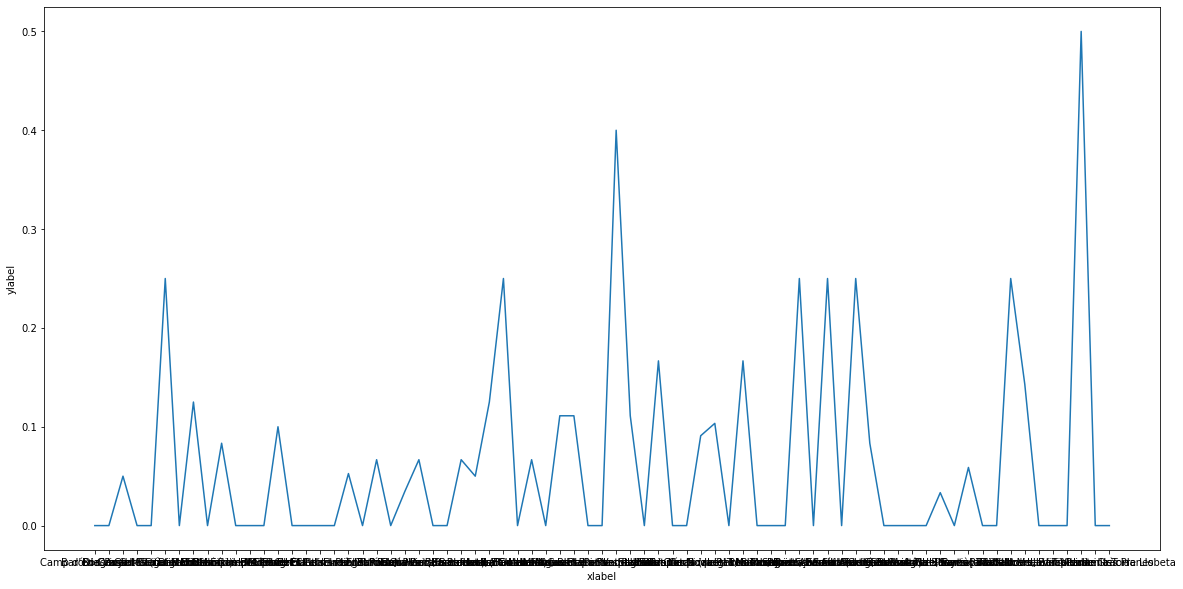

In [547]:
plt.figure(figsize=(20,10))
plt.plot(to_spain['Neighbourhood'], to_spain['Spanish Restaurant'])
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.show()

In [549]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

**10. Create a new dataframe to get the top 7 venues**





In [553]:
top_venues = 7
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = bcn_grouped['Neighbourhood']

for ind in np.arange(bcn_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(bcn_grouped.iloc[ind, :], top_venues)


**11. Clusters with KMeans**

In [554]:
bcn_grouped_clustering = bcn_grouped.drop('Neighbourhood', 1)

In [555]:
def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [556]:
max_range = 10 #Max range 10 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for bcn_clusters in range(2, max_range) :
    
    # Run k-means clustering
    bcn_gc = bcn_grouped_clustering
    kmeans = KMeans(n_clusters = bcn_clusters, init = 'k-means++', random_state = 0).fit_predict(bcn_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(bcn_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(bcn_clusters)
    scores.append(score)

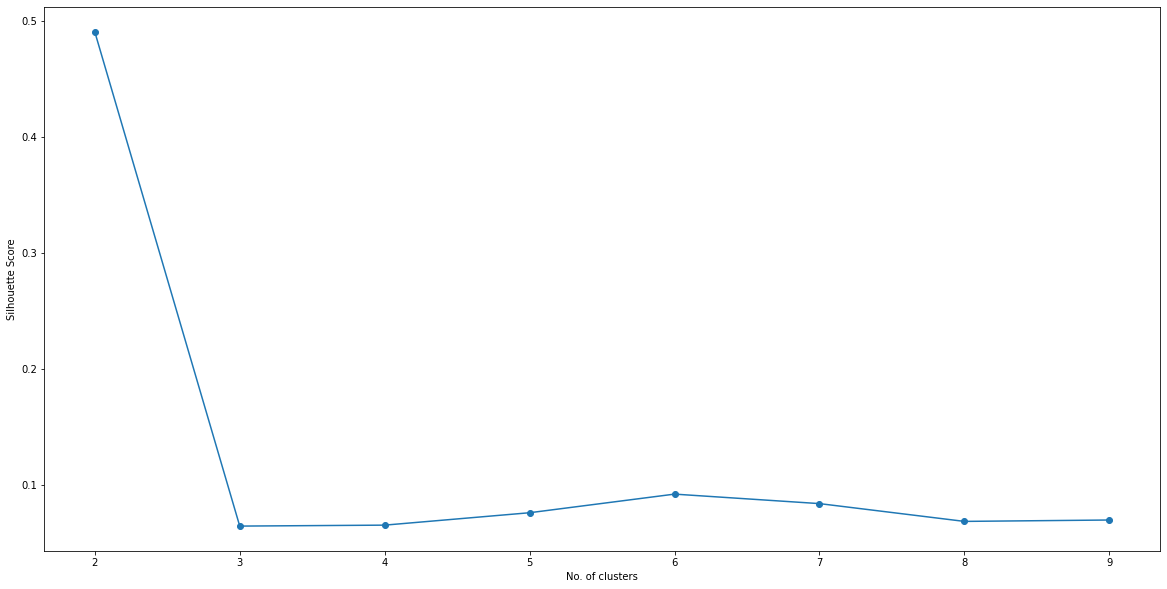

In [557]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [558]:
opt_value = 3 # optimizer value

In [559]:
bcn_clusters = opt_value

# Run k-means clustering
bcn_gc = bcn_grouped_clustering
kmeans = KMeans(n_clusters = bcn_clusters, init = 'k-means++', random_state = 0).fit(bcn_gc)

In [560]:
# Add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [561]:
bcn_final = bcn_data
bcn_final = bcn_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
bcn_final.dropna(inplace = True)
bcn_final['Cluster Labels'] = bcn_final['Cluster Labels'].astype(int)
bcn_final.head(20)

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,El Baix Guinardó,41.41022,2.16879,0,Grocery Store,Tapas Restaurant,Latin American Restaurant,Arepa Restaurant,Hotel,Spanish Restaurant,Beer Garden
1,"La Barceloneta, Barcelona",41.38185,2.19151,2,Bar,Mediterranean Restaurant,Italian Restaurant,Spanish Restaurant,Beach,Sushi Restaurant,Soccer Field
2,Baró de Viver,41.44804,2.19963,2,Plaza,Bakery,Metro Station,Dog Run,Gift Shop,Bar,Football Stadium
3,El Besòs i el Maresme,41.41666,2.21392,0,Bakery,General Entertainment,Bar,Farmers Market,Yoga Studio,Fountain,Football Stadium
4,Bon Pastor,41.43636,2.20325,0,Café,Metro Station,Athletics & Sports,Yoga Studio,Fast Food Restaurant,Fountain,Football Stadium
5,La Bordeta (Barcelona),41.36986,2.13622,0,Plaza,Coffee Shop,Food & Drink Shop,Spanish Restaurant,Grocery Store,Restaurant,Bakery
6,Camp d'en Grassot i Gràcia Nova,41.40859,2.16382,0,Bakery,Bar,Café,Supermarket,Farmers Market,Jazz Club,Spanish Restaurant
7,El Camp de l'Arpa del Clot,41.41068,2.18063,2,Burger Joint,Bakery,Restaurant,Italian Restaurant,Grocery Store,Hostel,South American Restaurant
8,Can Baró,41.41665,2.16253,0,Plaza,Grocery Store,Basketball Court,Football Stadium,Food Court,Food & Drink Shop,Food
9,Can Peguera,41.43508,2.16653,0,Café,Playground,Dog Run,Grocery Store,Yoga Studio,Football Stadium,Food Court


**12. Visualization in Folium Map on Barcelona**

In [564]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(bcn_clusters)
ys = [i + x + (i*x)**2 for i in range(bcn_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(bcn_final['Latitude'], bcn_final['Longitude'], bcn_final['Neighbourhood'], 
                                  bcn_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

**13. Visualizate 3 clusters**

In [565]:
val = 1
bcn_final.loc[bcn_final['Cluster Labels'] == (val - 1), bcn_final.columns[[0] + np.arange(4, bcn_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,El Baix Guinardó,Grocery Store,Tapas Restaurant,Latin American Restaurant,Arepa Restaurant,Hotel,Spanish Restaurant,Beer Garden
3,El Besòs i el Maresme,Bakery,General Entertainment,Bar,Farmers Market,Yoga Studio,Fountain,Football Stadium
4,Bon Pastor,Café,Metro Station,Athletics & Sports,Yoga Studio,Fast Food Restaurant,Fountain,Football Stadium
5,La Bordeta (Barcelona),Plaza,Coffee Shop,Food & Drink Shop,Spanish Restaurant,Grocery Store,Restaurant,Bakery
6,Camp d'en Grassot i Gràcia Nova,Bakery,Bar,Café,Supermarket,Farmers Market,Jazz Club,Spanish Restaurant
8,Can Baró,Plaza,Grocery Store,Basketball Court,Football Stadium,Food Court,Food & Drink Shop,Food
9,Can Peguera,Café,Playground,Dog Run,Grocery Store,Yoga Studio,Football Stadium,Food Court
10,Canyelles (neighbourhood),Spanish Restaurant,Bakery,Restaurant,Mediterranean Restaurant,Football Stadium,Food Court,Food & Drink Shop
12,Ciutat Meridiana,Plaza,Park,Metro Station,Grocery Store,Dessert Shop,Farmers Market,Food Court
27,"Horta, Barcelona",Bakery,Plaza,Metro Station,Sandwich Place,Football Stadium,Food Court,Food & Drink Shop


In [566]:
val = 2
bcn_final.loc[bcn_final['Cluster Labels'] == (val - 1), bcn_final.columns[[0] + np.arange(4, bcn_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
20,La Font d'en Fargues,Gym / Fitness Center,Yoga Studio,Falafel Restaurant,Football Stadium,Food Court,Food & Drink Shop,Food


In [567]:
val = 3
bcn_final.loc[bcn_final['Cluster Labels'] == (val - 1), bcn_final.columns[[0] + np.arange(4, bcn_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
1,"La Barceloneta, Barcelona",Bar,Mediterranean Restaurant,Italian Restaurant,Spanish Restaurant,Beach,Sushi Restaurant,Soccer Field
2,Baró de Viver,Plaza,Bakery,Metro Station,Dog Run,Gift Shop,Bar,Football Stadium
7,El Camp de l'Arpa del Clot,Burger Joint,Bakery,Restaurant,Italian Restaurant,Grocery Store,Hostel,South American Restaurant
11,El Carmel,Park,Garden,Food Court,Dog Run,Donut Shop,Yoga Studio,Football Stadium
13,El Clot,Tapas Restaurant,Park,Wine Shop,Plaza,Historic Site,Post Office,Spanish Restaurant
14,La Clota,Spanish Restaurant,Museum,Hostel,Sculpture Garden,Falafel Restaurant,Food Court,Food & Drink Shop
15,El Coll,Bakery,Mediterranean Restaurant,Athletics & Sports,Park,Yoga Studio,Football Stadium,Food Court
16,El Congrés i els Indians,Tapas Restaurant,Plaza,Gym / Fitness Center,Escape Room,Food Court,Food & Drink Shop,Food
17,Les Corts (neighbourhood),Spanish Restaurant,Sandwich Place,Hotel,Restaurant,Coffee Shop,Plaza,Bar
18,Diagonal Mar i el Front Marítim del Poblenou,Restaurant,Spanish Restaurant,Plaza,Tapas Restaurant,Hotel,Italian Restaurant,Paella Restaurant


**14. I want know where is the best place to install new Spanish Restaurant.**

In [568]:
search_query = 'Spanish Restaurant'
radius = 500
print(search_query + ' .... OK!')

Spanish Restaurant .... OK!


In [569]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W&client_secret=QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ&ll=41.3828939,2.1774322&v=20180605&query=Spanish Restaurant&radius=500&limit=30'

In [570]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6085b42c75caea17dcf7e779'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/halal_',
       'suffix': '.png'},
      'id': '52e81612bcbc57f1066b79ff',
      'name': 'Halal Restaurant',
      'pluralName': 'Halal Restaurants',
      'primary': True,
      'shortName': 'Halal'}],
    'hasPerk': False,
    'id': '543ec52a498e6e2ec8fd09d4',
    'location': {'address': 'Rambla Sant Josep 75',
     'cc': 'ES',
     'city': 'Barcelona',
     'country': 'España',
     'distance': 411,
     'formattedAddress': ['Rambla Sant Josep 75',
      '08002 Barcelona Cataluña',
      'España'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 41.381338550246184,
       'lng': 2.1729686727002813}],
     'lat': 41.381338550246184,
     'lng': 2.1729686727002813,
     'postalCode': '08002',
     'state': 'Cataluña'},
    'name': 'Habibi Restaurant',
    'referralId': 'v-1619375148',
    'venuePage': {'id

In [571]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

In [572]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.crossStreet
0,543ec52a498e6e2ec8fd09d4,Habibi Restaurant,"[{'id': '52e81612bcbc57f1066b79ff', 'name': 'H...",v-1619375148,False,Rambla Sant Josep 75,41.381339,2.172969,"[{'label': 'display', 'lat': 41.38133855024618...",411,08002,ES,Barcelona,Cataluña,España,"[Rambla Sant Josep 75, 08002 Barcelona Cataluñ...",96607744,NaN
1,4bba3a64cf2fc9b69f4ea102,Restaurant Sant Jaume,[],v-1619375148,False,NaN,41.383399,2.177881,"[{'label': 'display', 'lat': 41.383399, 'lng':...",67,NaN,ES,NaN,NaN,España,[España],NaN,NaN
2,4b62e49ef964a52096572ae3,Bar Restaurant Cervantes,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1619375148,False,"C. Cervantes, 7",41.381418,2.177552,"[{'label': 'display', 'lat': 41.38141782935224...",164,08004,ES,Barcelona,Cataluña,España,"[C. Cervantes, 7, 08004 Barcelona Cataluña, Es...",NaN,NaN
3,525476c511d2c5a744d4a95c,Arabia Bar & Restaurant,"[{'id': '4bf58dd8d48988d1c3941735', 'name': 'M...",v-1619375148,False,"C/ Escudellers, 25",41.379645,2.176328,"[{'label': 'display', 'lat': 41.379645, 'lng':...",373,08002,ES,Barcelona,Cataluña,España,"[C/ Escudellers, 25, 08002 Barcelona Cataluña,...",NaN,NaN
4,5f22bddf27fd2d7ccfdeba6b,Grill restaurant,"[{'id': '4bf58dd8d48988d1cc941735', 'name': 'S...",v-1619375148,False,NaN,41.383783,2.177176,"[{'label': 'display', 'lat': 41.383783, 'lng':...",101,08002,ES,Barcelona,Katalánsko,España,"[08002 Barcelona Katalánsko, España]",NaN,NaN


In [573]:
dataframe.shape

(30, 18)

In [574]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Habibi Restaurant,Halal Restaurant,Rambla Sant Josep 75,41.381339,2.172969,"[{'label': 'display', 'lat': 41.38133855024618...",411,08002,ES,Barcelona,Cataluña,España,"[Rambla Sant Josep 75, 08002 Barcelona Cataluñ...",NaN,543ec52a498e6e2ec8fd09d4
1,Restaurant Sant Jaume,None,NaN,41.383399,2.177881,"[{'label': 'display', 'lat': 41.383399, 'lng':...",67,NaN,ES,NaN,NaN,España,[España],NaN,4bba3a64cf2fc9b69f4ea102
2,Bar Restaurant Cervantes,Restaurant,"C. Cervantes, 7",41.381418,2.177552,"[{'label': 'display', 'lat': 41.38141782935224...",164,08004,ES,Barcelona,Cataluña,España,"[C. Cervantes, 7, 08004 Barcelona Cataluña, Es...",NaN,4b62e49ef964a52096572ae3
3,Arabia Bar & Restaurant,Moroccan Restaurant,"C/ Escudellers, 25",41.379645,2.176328,"[{'label': 'display', 'lat': 41.379645, 'lng':...",373,08002,ES,Barcelona,Cataluña,España,"[C/ Escudellers, 25, 08002 Barcelona Cataluña,...",NaN,525476c511d2c5a744d4a95c
4,Grill restaurant,Steakhouse,NaN,41.383783,2.177176,"[{'label': 'display', 'lat': 41.383783, 'lng':...",101,08002,ES,Barcelona,Katalánsko,España,"[08002 Barcelona Katalánsko, España]",NaN,5f22bddf27fd2d7ccfdeba6b
5,Pla Restaurant,Spanish Restaurant,"Carrer de Bellafila, 5",41.382227,2.178538,"[{'label': 'display', 'lat': 41.38222678516860...",118,08002,ES,Barcelona,Cataluña,España,"[Carrer de Bellafila, 5, 08002 Barcelona Catal...",NaN,4b106edaf964a520517023e3
6,Now-spanish,None,NaN,41.381811,2.172627,"[{'label': 'display', 'lat': 41.381811, 'lng':...",419,NaN,ES,NaN,NaN,España,[España],NaN,55d45661498eda3a7dc557e1
7,Restaurant CentOnze,Spanish Restaurant,"La Rambla, 111",41.383796,2.171109,"[{'label': 'display', 'lat': 41.38379580826611...",537,NaN,ES,Barcelona,Cataluña,España,"[La Rambla, 111, Barcelona Cataluña, España]",NaN,505f01d9e4b0351d974d1e83
8,Mercerino Restaurant,Restaurant,C/ dels Lledó 7,41.382851,2.178946,"[{'label': 'display', 'lat': 41.38285149385772...",126,08002,ES,Barcelona,Cataluña,España,"[C/ dels Lledó 7, 08002 Barcelona Cataluña, Es...",NaN,50586f38e4b0a8629c59c5ec
9,Mi Burrito y Yo Restaurante,Spanish Restaurant,NaN,41.381975,2.177052,"[{'label': 'display', 'lat': 41.38197500932306...",107,NaN,ES,NaN,NaN,España,[España],NaN,4cf14980e9425481e55769c5


In [575]:
dataframe_filtered['categories'].unique()

array(['Halal Restaurant', None, 'Restaurant', 'Moroccan Restaurant',
       'Steakhouse', 'Spanish Restaurant', 'Mediterranean Restaurant',
       'Seafood Restaurant', 'Bar', 'Tapas Restaurant',
       'Comfort Food Restaurant', 'Greek Restaurant'], dtype=object)

In [576]:
dataframe_filtered['categories'].replace([None],'Spanish Restaurant', inplace=True)

In [577]:
dataframe_filtered_SpanishRestaurant = dataframe_filtered[dataframe_filtered['categories'] == 'Spanish Restaurant']
dataframe_filtered_SpanishRestaurant.head(10)

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
1,Restaurant Sant Jaume,Spanish Restaurant,NaN,41.383399,2.177881,"[{'label': 'display', 'lat': 41.383399, 'lng':...",67,NaN,ES,NaN,NaN,España,[España],NaN,4bba3a64cf2fc9b69f4ea102
5,Pla Restaurant,Spanish Restaurant,"Carrer de Bellafila, 5",41.382227,2.178538,"[{'label': 'display', 'lat': 41.38222678516860...",118,08002,ES,Barcelona,Cataluña,España,"[Carrer de Bellafila, 5, 08002 Barcelona Catal...",NaN,4b106edaf964a520517023e3
6,Now-spanish,Spanish Restaurant,NaN,41.381811,2.172627,"[{'label': 'display', 'lat': 41.381811, 'lng':...",419,NaN,ES,NaN,NaN,España,[España],NaN,55d45661498eda3a7dc557e1
7,Restaurant CentOnze,Spanish Restaurant,"La Rambla, 111",41.383796,2.171109,"[{'label': 'display', 'lat': 41.38379580826611...",537,NaN,ES,Barcelona,Cataluña,España,"[La Rambla, 111, Barcelona Cataluña, España]",NaN,505f01d9e4b0351d974d1e83
9,Mi Burrito y Yo Restaurante,Spanish Restaurant,NaN,41.381975,2.177052,"[{'label': 'display', 'lat': 41.38197500932306...",107,NaN,ES,NaN,NaN,España,[España],NaN,4cf14980e9425481e55769c5
12,Mercer Restaurant Jean Luc Figueras,Spanish Restaurant,NaN,41.382744,2.179134,"[{'label': 'display', 'lat': 41.382744, 'lng':...",143,NaN,ES,NaN,NaN,España,[España],NaN,52a2e90311d26e7b44f4b269
17,7 Portes,Spanish Restaurant,"Passeig d'Isabel II, 14",41.382335,2.183399,"[{'label': 'display', 'lat': 41.38233512950261...",502,08003,ES,Barcelona,Cataluña,España,"[Passeig d'Isabel II, 14, 08003 Barcelona Cata...",NaN,4adcda53f964a520804221e3
19,Colom Restaurant,Spanish Restaurant,"C. Escudellers, 33",41.379847,2.176531,"[{'label': 'display', 'lat': 41.37984749684477...",347,08002,ES,Barcelona,Cataluña,España,"[C. Escudellers, 33, 08002 Barcelona Cataluña,...",NaN,4f19d5ade4b0aa5093213fae
22,Nexes Restaurant,Spanish Restaurant,"Banys Nous, 8",41.382137,2.175313,"[{'label': 'display', 'lat': 41.382137, 'lng':...",196,08001,ES,Barcelona,Cataluña,España,"[Banys Nous, 8 (carrer del call), 08001 Barcel...",carrer del call,4bd7ef72dc4b9521c0207888
26,Terrace Caliu,Spanish Restaurant,Tantarantana,41.386530,2.181437,"[{'label': 'display', 'lat': 41.38652987561511...",525,NaN,ES,Barcelona,Cataluña,España,"[Tantarantana, Barcelona Cataluña, España]",NaN,4c0a3eb46071a593bd2fdf32


In [578]:
dataframe_filtered_SpanishRestaurant.name

1                   Restaurant Sant Jaume
5                          Pla Restaurant
6                             Now-spanish
7                     Restaurant CentOnze
9             Mi Burrito y Yo Restaurante
12    Mercer Restaurant Jean Luc Figueras
17                               7 Portes
19                       Colom Restaurant
22                       Nexes Restaurant
26                          Terrace Caliu
Name: name, dtype: object

In [579]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=15,
    color='red',
    popup='Majestic Hotel & Spa',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered_SpanishRestaurant.lat, dataframe_filtered_SpanishRestaurant.lng, dataframe_filtered_SpanishRestaurant.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [580]:
dataframe_filtered_SpanishRestaurant.id

1     4bba3a64cf2fc9b69f4ea102
5     4b106edaf964a520517023e3
6     55d45661498eda3a7dc557e1
7     505f01d9e4b0351d974d1e83
9     4cf14980e9425481e55769c5
12    52a2e90311d26e7b44f4b269
17    4adcda53f964a520804221e3
19    4f19d5ade4b0aa5093213fae
22    4bd7ef72dc4b9521c0207888
26    4c0a3eb46071a593bd2fdf32
Name: id, dtype: object

In [581]:
for i in dataframe_filtered_SpanishRestaurant.id:
  url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
  result = requests.get(url).json()
  try:
      print(result['response']['venue']['rating'])
  except:
      print('This venue has not been rated yet.')
  

This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.


**<h3>.6 Conclusion:<h3>**


1.   At first part of this code: I want to see what is the best location to open a Spanish Restaurant in Barcelona City. I shoud have to know the popular hotels in there. Due to transport and situation, I decide search new opportunities around Magestic Hotel. I watch many different restaurant'style in there but few Spanish Restaurants. Apart of these, I can see the most common venue depending of neighbours. It give me some caracteristics and ideas to install my restaurant. I see location of gym, school, bars and other items that I need to know for my study object.
2. I see there are 8 Spanish Restaurants around Majestic Hotel location them, currently on Barri Gotic. So, there are two good oportunities at Camp d'en Grassot i Gràcia Nova and at Vall d'Hebron. If I consider more items I can see first option is better than last other because, in there place there are few seafood and mediterranian restaurants but it's important item for their neighbours and transit turism is better than other option.

